In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Part A: Data Preparation

In [2]:
#load the csv files into a df
df_trade= pd.read_csv("historical_data.csv")
print(df_trade.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [26]:
df_trade.shape

(211224, 18)

In [27]:
df_trade.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [3]:
df_sent= pd.read_csv("fear_greed_index.csv")
print(df_sent.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [25]:
df_sent.shape

(2644, 6)

In [28]:
df_sent.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
Date,0
Time,0


In [4]:
#Convert trade timestamps to datetime using ms to fix the 1970 glitch present in the dataset
df_trade["Timestamp"]= pd.to_datetime(df_trade["Timestamp"], unit="ms")

In [5]:
#Convert sent dates to datetime
df_sent["date"]= pd.to_datetime(df_sent["date"])
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [6]:
#Create a matching column named Date for a successful merge
df_trade["Date"]= df_trade["Timestamp"].dt.date
df_trade["Time"]= df_trade["Timestamp"].dt.time
df_trade

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40,2025-06-15,15:06:40
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40,2025-06-15,15:06:40
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40,2025-06-15,15:06:40
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40,2025-06-15,15:06:40


In [7]:
#Create a matching column named Date for a successful merge
df_sent["Date"]= df_sent["date"].dt.date
df_sent["Time"]= df_sent["date"].dt.time

In [8]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [9]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
 4   Date            2644 non-null   object        
 5   Time            2644 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 124.1+ KB


In [10]:
#Merge the two Date columns from the different df into one
df_merged= pd.merge(df_trade, df_sent, on="Date", how="inner")
df_merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,Date,Time_x,timestamp,value,classification,date,Time_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,...,0.055176,6.900000e+14,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,...,0.100200,6.610000e+13,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,...,0.052504,1.010000e+15,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,...,0.057982,2.700000e+13,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00


##Part B: Analysis

In [16]:
#Total profit and loss
total_pnl= df_merged["Closed PnL"].sum()
total_pnl

np.float64(10225249.595801996)

In [19]:
#I am creating a column that marks 1 for a win and 0 for loss
df_merged["is_win"]= df_merged["Closed PnL"]> 0
df_merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,Date,Time_x,timestamp,value,classification,date,Time_y,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,8.950000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,4.430000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,6.600000e+14,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,1.080000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,1.050000e+15,2024-10-27 03:33:20,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,...,6.900000e+14,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,...,6.610000e+13,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,...,1.010000e+15,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,...,2.700000e+13,2025-02-19 21:20:00,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False


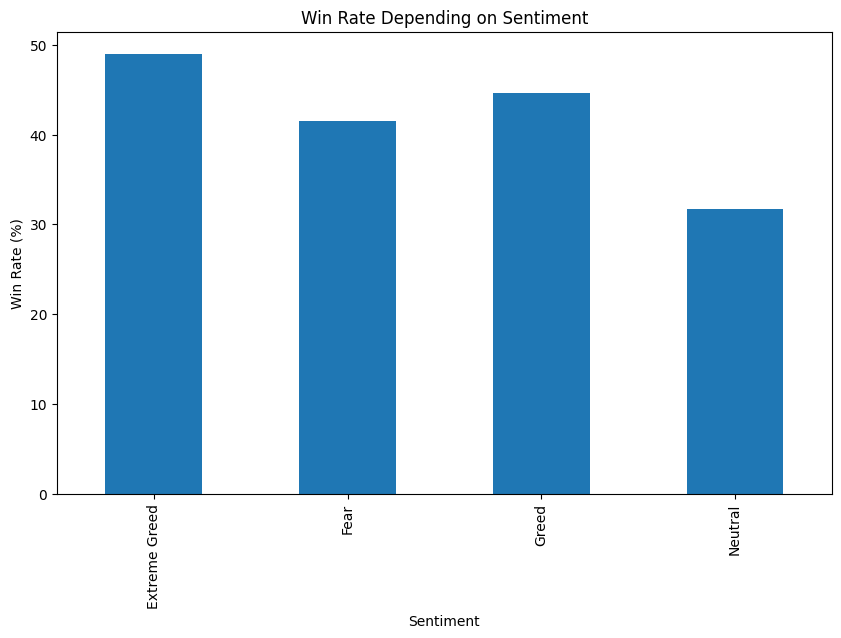

In [24]:
#Plotting win rates
plt.figure(figsize=(10,6))
sent_analysis.plot(kind="bar", title="Win Rate Depending on Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.show()

**Question 1:** Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


In [29]:
#Calculate overall win rate
win= (df_merged["Closed PnL"]> 0).mean() * 100
win

np.float64(42.03502602258728)

In [30]:
#Group results
performance= df_merged.groupby("classification").agg({
    "is_win": "mean",
    "Closed PnL": "sum"
}).rename(columns={"is_win": "Win Rate",
                   "Closed PnL": "Total PnL"})
performance

,Win Rate,Total PnL
classification,,
Extreme Greed,0.490089,1.769655e+05
Fear,0.415146,6.699925e+06
Greed,0.446471,3.189617e+06
Neutral,0.317182,1.587424e+05


**Question 2:** Do traders change behavior based on sentiment?

In [31]:
#Count how many people trade during greed or fear
sent_count= df_merged["classification"].value_counts()
sent_count

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [32]:
#To determine win rate for each mood
sent_analysis= df_merged.groupby("classification")["is_win"].mean()* 100
sent_analysis

,is_win
classification,
Extreme Greed,49.008905
Fear,41.514592
Greed,44.647138
Neutral,31.718247


Traders in this dataset are much more successful when the market is in extreme greed compared to fear.
The value counts shows that 133,871 trades happened during fear but only 6,962 happened during extreme greed. This means that people trade more when they are less likely to win and trade less when win rate is highest.

**Question 3:** Identify 2–3 segments (examples):
1. high leverage vs low leverage traders
2. frequent vs infrequent traders
3. consistent winners vs inconsistent traders


In [34]:
#Split traders into large and small based on median trade size
median_size= df_merged["Size USD"].median()
df_merged["Segment"] = df_merged["Size USD"].apply(lambda x: "Large Trade Size" if x > median_size else "Small Trade Size")

In [35]:
segment_analysis= df_merged.groupby(["Segment", "classification"])["is_win"].mean()* 100
segment_analysis

Segment           classification
Large Trade Size  Extreme Greed     45.420028
                  Fear              42.719901
                  Greed             39.261685
                  Neutral           40.741957
Small Trade Size  Extreme Greed     54.512373
                  Fear              40.267498
                  Greed             49.286960
                  Neutral           25.006105
Name: is_win, dtype: float64

##Part C:
Propose 2 strategy ideas or “rules of thumb” based on your findings.

**Strategy 1:** The fear filter for small traders.

Small traders have the lowest win rates during the fear and neutral market sentiments. This means that the filter should trigger a warning to reduce trade frequency in order to prevent panic trading.

**Strategy 2:** Extreme Greed Boost

Since the highest win rate occurs during extreme greed, there should be an indicator to let traders increase USD size to be able to be more profitable.

Creating my predictive model using Decision Tree Classifier



In [37]:
#convert the words to numbers so the model can understand
mood_mapping= {"Fear": 0, "Neutral": 1, "Greed": 2, "Extreme Greed": 3}
df_merged["mood_num"]= df_merged["classification"].map(mood_mapping)
df_merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Date,Time_x,timestamp,value,classification,date,Time_y,is_win,Segment,mood_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False,Large Trade Size,2
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False,Small Trade Size,2
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False,Large Trade Size,2
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False,Large Trade Size,2
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,2024-10-27,03:33:20,1730007000,74,Greed,2024-10-27,00:00:00,False,Small Trade Size,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,...,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False,Small Trade Size,0
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,...,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False,Large Trade Size,0
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,...,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False,Small Trade Size,0
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,...,2025-02-19,21:20:00,1739943000,44,Fear,2025-02-19,00:00:00,False,Small Trade Size,0


In [38]:
#Creating features and Target
X= df_merged[["mood_num", "Size USD"]]
y= df_merged["is_win"]

In [40]:
#splitting data into train: 80%, test:20%
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
accuracy= model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5825577293571758


I developed a Decision Tree model that predicts trade outcomes with 58.26% accuracy by analyzing market sentiment alongside trade size. This proves that this predictive model can proactively alert traders when their planned trade size is statistically risky given the current market sentiment.

##Conclusion:
Traders in this dataset perform best during "Extreme Greed" (49% win rate) but mistakenly trade most frequently during "Fear" where their success rate is much lower. My predictive model uses market sentiment and size USD to achieve 58.26% accuracy in identifying these high-risk behaviors. To improve overall profitability, users should stop trading during "Neutral" days and reduce position sizes during "Fear".

In [43]:
import joblib
joblib.dump(model, "trading_model.pkl")

['trading_model.pkl']